In [ ]:
import pandas as pd
url = "https://drive.google.com/file/d/1tz6nYNATZIyWwrrho3XbAM9a9XQzhC_T/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


## Question 1 (20pts)
Analyze the correlation matrix and identify the top three features that are most appropriate for the dependent variable **Chance of Admit**.

**Note:** Ensure to address multicollinearity while selecting the features.

In [4]:
import pandas as pd

url = "https://drive.google.com/file/d/1tz6nYNATZIyWwrrho3XbAM9a9XQzhC_T/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
data_frame = pd.read_csv(path)
data_frame = data_frame.drop(columns=['Serial No.'])

corr_matrix = data_frame.corr()

target_corr = corr_matrix['Chance of Admit '].sort_values(ascending=False)
print(target_corr)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit , dtype: float64


## Question 2 (40pts)
Normalize the features using Min-Max normalization, then build a multiple linear regression model to predict the Chance of Admit. After fitting the model, evaluate its performance on test set using the R^2 score and interpret the result.

**Note:** The goal of scaling is to ensure that all features have the same magnitude. This allows us to compare the parameters on a similar scale after training, where higher parameter values indicate a greater impact and lower values indicate a lesser impact.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


selected_features = ['CGPA', 'GRE Score', 'TOEFL Score']
X_data = data_frame[selected_features]
y_data = data_frame['Chance of Admit ']

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

data_scaler = MinMaxScaler()
X_train_scaled_data = data_scaler.fit_transform(X_train_data)
X_test_scaled_data = data_scaler.transform(X_test_data)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled_data, y_train_data)

y_predicted = linear_model.predict(X_test_scaled_data)

r2_result = r2_score(y_test_data, y_predicted)
print(f"R^2 Score: {r2_result}")

R^2 Score: 0.7962198319810173


## Question 3 (20pts)
Create a bar chart with the selected features on the x-axis and their corresponding coefficients on the y-axis. Use the chart to interpret how each feature influences the target variable.


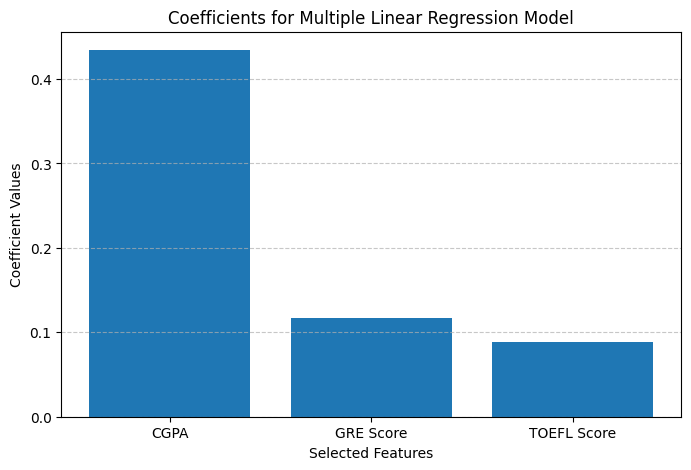

Feature Coefficients:
CGPA: 0.4342375724619857
GRE Score: 0.11736362046399867
TOEFL Score: 0.08885118212439688


In [8]:
import matplotlib.pyplot as plt

coef_values = linear_model.coef_

plt.figure(figsize=(8, 5))
plt.bar(selected_features, coef_values)
plt.xlabel('Selected Features')
plt.ylabel('Coefficient Values')
plt.title('Coefficients for Multiple Linear Regression Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Feature Coefficients:")
for feature, coef in zip(selected_features, coef_values):
    print(f"{feature}: {coef}")


## Question 4 (20pts)
Make a prediction for a random instance from the test dataset, and then determine which feature had the most significant impact on the prediction.

In [12]:
import numpy as np

random_index = np.random.randint(0, X_test_scaled.shape[0])
random_instance = X_test_scaled[random_index].reshape(1, -1)

predicted_value = model.predict(random_instance)[0]

feature_contributions = model.coef_ * random_instance.flatten()

most_impactful_feature = features[np.argmax(np.abs(feature_contributions))]

print(f"Predicted value for the selected instance: {predicted_value}")
print("Feature contributions to the prediction:")
for feature, contribution in zip(features, feature_contributions):
    print(f"{feature}: {contribution}")
print(f"The most impactful feature on this prediction is: {most_impactful_feature}")


Predicted value for the selected instance: 0.6902730389882552
Feature contributions to the prediction:
CGPA: 0.22964487005201162
GRE Score: 0.04225090336703956
TOEFL Score: 0.05394536057552669
The most impactful feature on this prediction is: CGPA
